In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy.random import default_rng
from time import process_time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#The Rosenbrock function
def rosen(x):
    
    return 100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0

def CostFunction(x):
    return rosen(x)

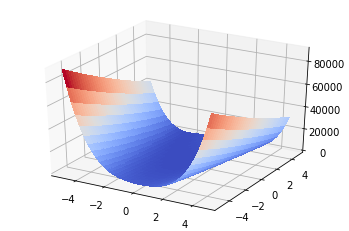

In [3]:


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = 100.0*(Y-X**2.0)**2.0 + (1-X)**2.0

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.savefig("D:\\BIG_DATA\\DSTI\\OneDrive - Data ScienceTech Institute\\2020-05-25-MetaHeuristic\\assignement\\explanation\\Figures\\" + "RosenbrockShape.png",bbox_inches='tight')

In [4]:
def gradFxBanana(x):
    """Gradient of the Banana Rosenbrok Function"""
    x = np.asarray(x)
    
    grad = np.zeros_like(x)
    
    grad[0] = -400*x[0]*(x[1] - x[0]**2) -2*(1-x[0])
    grad[1] = 200*(x[1]-x[0]**2)
    
    return grad


def gradFx(x):
    
    return gradFxBanana(x)



In [5]:
def HesFxBanana(x):
    """Hessian of the Banana Rosenbrok Function"""
    x = np.asarray(x)
    
    diagonal = np.zeros_like(x)
    diagonal[0] = -400*(x[1]-3*x[0]**2)+2
    diagonal[1] =  200
    
    H = np.diag(diagonal)
    H[1][0] = -400*x[0]
    H[0][1] = -400*x[0]
    return H

In [6]:
def HesInvBanana(x):
    diagonal = np.zeros_like(x)
    diagonal[1] = -400*(x[1]-3*x[0]**2)+2
    diagonal[0] =  200
    
    M = np.diag(diagonal)
    M[1][0] = 400*x[0]
    M[0][1] = 400*x[0]
    
    det = (80000*(x[0]**2 - x[1]) +400)
    
    if det == 0:
        print("Singular Hessian at point {0} - Cannot invert".format(x)) # case when the Hessian is not invertible
    
    M=(1/det) * M
    
    return M

def HesInv(x):
    return HesInvBanana(x)
    


In [7]:
x0 = np.array([5.0,5.0])

In [8]:
def CheckIsFeasiblePoint(ListPoint,lBound,uBound):
    """Check if the point is a within the lower and upper bounds"""
    
    if (ListPoint[-1][0] >= lBound) & (ListPoint[-1][0] <= uBound) & (ListPoint[-1][1] >= lBound) & (ListPoint[-1][1] <= uBound):
        return 0 # 0 = point within boundaries
        
    else:
        return 1 # 1 = point outside boundaries
            

def CheckSuccess(listCostF, Minimum):
    """Check if the value of the cost function is equal or close to the given Minimum"""
    if Minimum is None:
        return None
    
    elif abs(listCostF[-1] - Minimum ) < 0.00001:
        return 0 # Cost Function close to known min
    
    else:
        return 1 # Cost Function NOT close to known min

    
def CheckKnownMin(listPoint, MinimumPoint):
    """Check if point in object is equal or close to the given point of Minimum"""
    
    if MinimumPoint is None:
        return None
    
    elif np.sqrt((listPoint[-1] - MinimumPoint).dot(listPoint[-1] - MinimumPoint)) < 0.0005:
        return 0 # Known Min reached
    
    else:
        return 1 # Known Min NOT reached
        
    
        
        
        
def Newton(lowerBound, upperBound, x0, nIter, knownMinPoint = None, knownMinFCost = None, epsilon = 1):
    
    """Newton algorithm which uses the inverse of the Hessian of the function"""
    
    resultCoord = list()
    resultCoordX = list()
    resultCoordY = list()


    resultCostF = list()
    isFeasible = list()
    
    ResultFeasible = 0
    
    resultCoord.append(x0)
    resultCoordX.append(x0[0])
    resultCoordY.append(x0[1])
    
    resultCostF.append(CostFunction(x0))
    
    minFCost= CostFunction(x0)
    
    isFeasible.append(CheckIsFeasiblePoint(resultCoord,lowerBound,upperBound))
    
    convergence = 0
    
    for n in range(1,nIter+1):
        
        newX = resultCoord[-1] - epsilon*(HesInv(resultCoord[-1])).dot(gradFx(resultCoord[-1])) # new point
        
        resultCoord.append(newX)
        resultCoordX.append(newX[0])
        resultCoordY.append(newX[1])
       
        
        resultCostF.append(CostFunction(newX))
        
        if minFCost > CostFunction(newX):
            minFCost = CostFunction(newX)
        
        isFeasible.append(CheckIsFeasiblePoint(resultCoord,lowerBound,upperBound))
        
        #check convergence
        if abs(resultCostF[-2] - resultCostF[-1])< 0.000005 :
            convergence = convergence + 1
            
        if convergence >= 11:
            break
        
    success = CheckSuccess(resultCostF,knownMinFCost)
    
    ResultFeasible = CheckKnownMin(resultCoord, knownMinPoint)
            
    recapResults = {"CoordinateHistory":resultCoord,"CoordinateHistoryX":resultCoordX,"CoordinateHistoryY":resultCoordY,"CostHistory":resultCostF,"FeasibleHistory": isFeasible, "NumIter":n, "LastCostIsKnownMin": success, "LastPointIsKnownMin":ResultFeasible }
          
    return recapResults, minFCost
    

In [9]:
# test
# l = -5
# u = 5

# Newton(l, u, x0, 10, np.array([1,1]) ,0, 1 )

In [10]:
#create a grid of 50 point within [-5,-5] [5,5]

def CreateGrid2D(lowerBound,upperBound, numberOfPoint):
    
    rng = default_rng()
    
    Xvals = rng.uniform(lowerBound,upperBound,numberOfPoint)
    
    Yvals = rng.uniform(lowerBound,upperBound,numberOfPoint)
    
    return np.column_stack((Xvals,Yvals))



In [11]:
# l = -5
# u = 5

# CreateGrid2D(l,u, 5)

In [12]:
def IterateAlgo_v2(l, u, algo, StartingPoint, knownMinPoint=np.array([1,1]), knownMinF = 0, epsSize = 1,nIter = 10, AlgoType = None ):
    FinalResult = list()
    timeHist = np.zeros(len(StartingPoint))
    lowestHist = np.zeros(len(StartingPoint))
    
    count = 1
    failures = 0 

    for iniPoint in StartingPoint:
        timeStart = process_time()        
        outcome, lowestF = algo(l, u, iniPoint, nIter, knownMinPoint ,knownMinF, epsSize)
        timeEnd = process_time()
        
        timeHist[count-1] = timeEnd - timeStart
        lowestHist[count-1]=lowestF

        if outcome["LastPointIsKnownMin"] + outcome["FeasibleHistory"][-1] >0:
            failures = failures + 1

        FinalResult.append(outcome)
        

        plt.figure(figsize=(12, 5))
        fig, (ax1, ax2) = plt.subplots(2)
        fig.suptitle("Run number" + str(count))
        
        ax1.set(xlabel="Iterations",ylabel="Value of Cost Function", title="Cost Function during exploration")
        
        ax1.plot(FinalResult[-1]["CostHistory"])    
        
        ax2.set(xlabel="Iterations",ylabel="Coordinate x or y",title = 'Decisional space exploration')
        ax2.plot(FinalResult[-1]["CoordinateHistoryX"], "g", label = 'x')
        ax2.plot(FinalResult[-1]["CoordinateHistoryY"], "r", label = 'y')
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
               
        plt.savefig(location + AlgoType + "_" + str(count) + ".png",bbox_inches='tight')
        plt.close('all')
        count = count+1

    print("Summary:\n")
    print("\t Total number of runs: {0}".format(len(StartingPoint)))
    print("\t Total number of failures (either the known min was not hit or the final point is not feasible): {0}".format(failures))
    print("\t Success rate: {0}%".format( (len(StartingPoint)- failures)/len(StartingPoint)*100 ) )
    print("\t The best value found across all runs is: {0}, corresponding to: \n\t\t the point = {1} \n\t\t starting point {2}".format(min(lowestHist),FinalResult[np.argmin(lowestHist)]["CoordinateHistory"][-1],FinalResult[np.argmin(lowestHist)]["CoordinateHistory"][0] ))
    print("\t The algorithm found values of the cost function within a distance of 10 from the known min in {0} % of the runs".format(( len(lowestHist[abs(lowestHist - knownMinF) <= 10])/len(lowestHist))*100))
    
    
    
    return FinalResult, lowestHist, failures, timeHist


In [13]:
location = "D:\\BIG_DATA\\DSTI\\OneDrive - Data ScienceTech Institute\\2020-05-25-MetaHeuristic\\assignement\\exercise2\\"

StartP = CreateGrid2D(-5,5, 50)
lB = -5
uB = 5

ResultIteration, LowestAtEachRun, failureAtRun, timeExeSingleRun = IterateAlgo_v2(lB, uB, algo = Newton, StartingPoint = StartP, knownMinPoint = np.array([1,1]), knownMinF = 0, epsSize = 1, nIter = 10, AlgoType = "Rosenbrok")

Summary:

	 Total number of runs: 50
	 Total number of failures (either the known min was not hit or the final point is not feasible): 0
	 Success rate: 100.0%
	 The best value found across all runs is: 0.0, corresponding to: 
		 the point = [1. 1.] 
		 starting point [2.91032625 3.53550349]
	 The algorithm found values of the cost function within a distance of 10 from the known min in 100.0 % of the runs


In [14]:
timeExeSingleRun.mean()

0.001875

<Figure size 864x360 with 0 Axes>

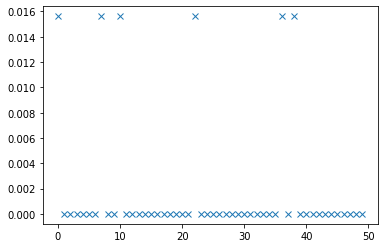

In [15]:
plt.figure(figsize=(12, 5))
fig, timeplot = plt.subplots(1)

timeplot.plot(timeExeSingleRun, 'x')

In [16]:
def EggCrate(x):
    return x[0]**2 + x[1]**2 + 25 * ( (np.sin(x[0]))**2 + (np.sin(x[1]))**2 )

def CostFunction(x):
    return EggCrate(x)

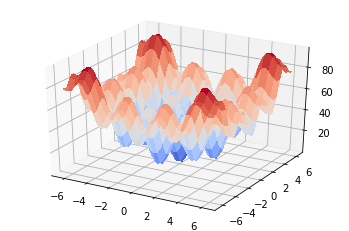

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-6.28, 6.28, 0.25)
Y = np.arange(-6.28, 6.28, 0.25)
X, Y = np.meshgrid(X, Y)

Z = X**2 + Y**2 + 25 * ( (np.sin(X))**2 + (np.sin(Y))**2 )

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.savefig("D:\\BIG_DATA\\DSTI\\OneDrive - Data ScienceTech Institute\\2020-05-25-MetaHeuristic\\assignement\\explanation\\Figures\\" + "EggCrate.png",bbox_inches='tight')

In [18]:
def gradFxEggCrate(x):
    """Gradient of the EggCrate Function"""
    x = np.asarray(x)
    
    grad = np.zeros_like(x)
    
    grad[0] = 2*x[0] + 50 * np.cos(x[0]) * np.sin(x[0])
    grad[1] = 2*x[1] + 50 * np.cos(x[1]) * np.sin(x[1])
    
    return grad

def gradFx(x):
    
    return gradFxEggCrate(x)

In [19]:
def HesInvEggCrate(x):
    diagonal = np.zeros_like(x)
    diagonal[0] = 2 + 50*(2* (np.cos(x[1]))**2 - 1)
    diagonal[1] = 2 + 50*(2* (np.cos(x[0]))**2 - 1)
    
    M = np.diag(diagonal)
    
    det = 2404 -4700*( (np.cos(x[0] ))**2 + (np.cos(x[1] ))**2 ) + 10000*( ((np.cos(x[0] ))**2) * ((np.cos(x[1] ))**2) )
    
    if det == 0:
        print("Singular Hessian at point {0} - Cannot invert".format(x)) # case when the Hessian is not invertible
    
    M=(1/det) * M
    
    return M

def HesInv(x):
    return HesInvEggCrate(x)
    

In [20]:
# Test
# l = -2* np.pi
# u = 2* np.pi

# StartP = CreateGrid2D(l,u, 50)

# Newton(l, u, x0, 1000, np.array([0,0]) ,0, 5)

In [21]:
lB = -2* np.pi
uB = 2* np.pi
StartP = CreateGrid2D(lB,uB, 50)

# input parameters: algo,StartingPoint, epsSize = 1,nIter = 10, AlgoType = None

                                            
ResultIteration, LowestAtEachRun, failureAtRun, timeExeSingleRun  = IterateAlgo_v2(l = lB, u = uB, algo = Newton, StartingPoint = StartP, knownMinPoint = np.array([0,0]), knownMinF = 0, epsSize = 1,nIter = 100, AlgoType = "EggCrate" )

Summary:

	 Total number of runs: 50
	 Total number of failures (either the known min was not hit or the final point is not feasible): 50
	 Success rate: 0.0%
	 The best value found across all runs is: 9.488197339106259, corresponding to: 
		 the point = [ 3.34876179e-15 -3.01960188e+00] 
		 starting point [-0.65534075 -3.34891467]
	 The algorithm found values of the cost function within a distance of 10 from the known min in 2.0 % of the runs


In [23]:
timeExeSingleRun.mean()

0.005

In [24]:
lB2 = - 2
uB2 = 2
StartP2 = CreateGrid2D(lB2,uB2, 50)

# input parameters: algo,StartingPoint, epsSize = 1,nIter = 10, AlgoType = None
ResultIteration2, LowestAtEachRun2, failureAtRun2, timeExeSingleRun2 = IterateAlgo_v2(l = lB2, u = uB2, algo = Newton, StartingPoint = StartP2, knownMinPoint = np.array([0,0]), knownMinF = 0, epsSize = 1,nIter = 100, AlgoType = "EggCrate_2" )

Summary:

	 Total number of runs: 50
	 Total number of failures (either the known min was not hit or the final point is not feasible): 44
	 Success rate: 12.0%
	 The best value found across all runs is: 2.3297535508866834e-29, corresponding to: 
		 the point = [7.89029527e-16 5.22964113e-16] 
		 starting point [-0.60072224 -0.51678673]
	 The algorithm found values of the cost function within a distance of 10 from the known min in 12.0 % of the runs


In [25]:
lB3 = - 1
uB3 = 1
StartP3 = CreateGrid2D(lB3,uB3, 50)

# input parameters: algo,StartingPoint, epsSize = 1,nIter = 10, AlgoType = None
ResultIteration3, LowestAtEachRun3, failureAtRun3, timeExeSingleRun4 = IterateAlgo_v2(lB3, uB3, algo = Newton, StartingPoint = StartP3, knownMinPoint = np.array([0,0]), knownMinF = 0, epsSize = 1, nIter = 100, AlgoType = "EggCrate_3")

Summary:

	 Total number of runs: 50
	 Total number of failures (either the known min was not hit or the final point is not feasible): 29
	 Success rate: 42.0%
	 The best value found across all runs is: 7.147121655778748e-30, corresponding to: 
		 the point = [-5.19086968e-16  7.37428890e-17] 
		 starting point [-0.58325062  0.03352312]
	 The algorithm found values of the cost function within a distance of 10 from the known min in 56.00000000000001 % of the runs


In [26]:
lB4 = - 0.4
uB4 = 0.4
StartP4 = CreateGrid2D(lB4,uB4, 50)

# input parameters: algo,StartingPoint, epsSize = 1,nIter = 10, AlgoType = None
ResultIteration4, LowestAtEachRun4, failureAtRun4, timeExeSingleRun5 = IterateAlgo_v2(lB4, uB4, algo = Newton, StartingPoint = StartP4, knownMinPoint = np.array([0,0]), knownMinF = 0, epsSize = 1, nIter = 100, AlgoType = "EggCrate_close4")

Summary:

	 Total number of runs: 50
	 Total number of failures (either the known min was not hit or the final point is not feasible): 0
	 Success rate: 100.0%
	 The best value found across all runs is: 5.1748051462590434e-30, corresponding to: 
		 the point = [-1.95224922e-16 -4.01146104e-16] 
		 starting point [-0.01992103 -0.04158262]
	 The algorithm found values of the cost function within a distance of 10 from the known min in 100.0 % of the runs
